<h1 align="center">How to sample from a normal distribution</h1> 

In [1]:
import time
import hashlib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

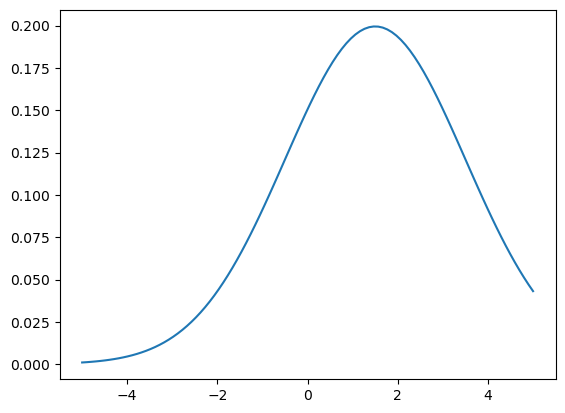

In [2]:
# PROBABILITY DENSITY FUNCTION OF A NORMAL DISTRIBUTION

def get_pdf(mu, sigma):
    prefactor = 1 / (sigma * np.sqrt(2 * np.pi))
    return lambda x: prefactor * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

pdf = get_pdf(1.5, 2)
x = np.linspace(-5, 5, 100)
plt.plot(x, pdf(x))
plt.show()

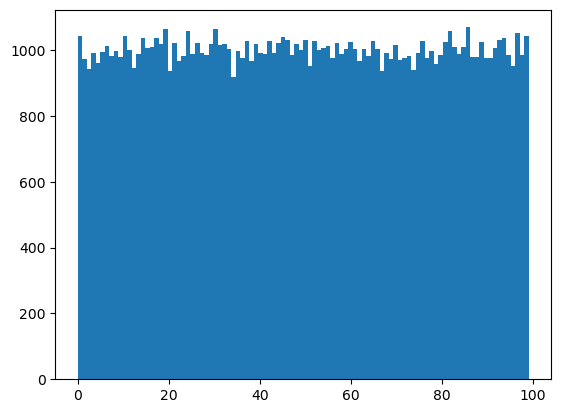

mu:  49.52071
sigma:  28.86598432577521


In [3]:
# GENERATION OF PSEUDO RANDOM NUMBERS

def generate_pseudo_random_number():

    # take the current time stamp
    ts = time.time()
    
    # hash it
    x = hashlib.sha256(str(ts).encode('utf-8')).hexdigest()

    # convert it to an integer
    x = int('0x' + x, 16)

    # only the the two last digits
    x = x % 100

    return x

pseudo_random_number = np.array([generate_pseudo_random_number() for _ in range(int(1e5))])
plt.hist(pseudo_random_number, bins=100)
plt.show()

MU = pseudo_random_number.mean()
SIGMA = pseudo_random_number.std()

print('mu: ', MU)
print('sigma: ', SIGMA)

In [4]:
# CENTRAL LIMIT THEOREM TO GENERATE A NORMAL DISTRIBUTION FROM ANY OTHER 
# DISTRIBUTION (HERE: DISTRIBUTION OF PSEUDO RANDOM NUMBERS)

def generate_normally_distributed_random_number(n = 25):
    pseudo_random_numbers = np.array([generate_pseudo_random_number() for _ in range(n)])
    average = pseudo_random_numbers.mean()
    return np.sqrt(n) * (average - MU) / SIGMA

100%|██████████| 100000/100000 [00:03<00:00, 27116.64it/s]


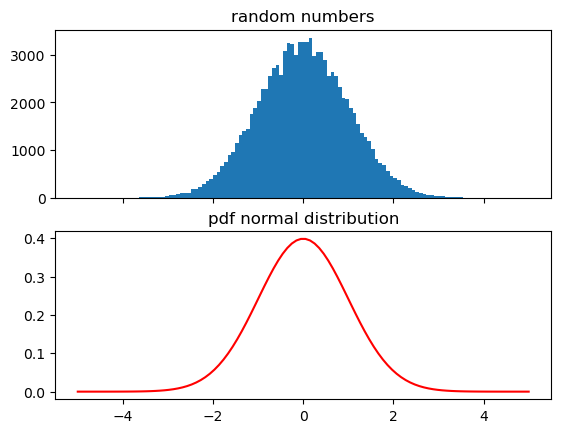

In [5]:
# DRAW NORMALLY DISTRIBUTED RANDOM NUMBERS

# generate
random_numbers = []
for _ in trange(100000):
    x = generate_normally_distributed_random_number()
    random_numbers.append(x)
random_numbers = np.array(random_numbers)

# control plot

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
ax1.hist(random_numbers, bins=100)
ax1.set_title("random numbers")

pdf = get_pdf(0, 1)
x = np.linspace(-5, 5, 100)
ax2.plot(x, pdf(x), color="red")
ax2.set_title("pdf normal distribution")
plt.show()